# Project Description

The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

Note that all the contained accident data comes from police reports, so this data does not include minor incidents.

## What are we aiming to find about?

* What is effecting accident in UK?
* Where in London are the accidents are most?
* What is a good weather to drive?
* When are the most accidents happen?
* How speed limit effects accident?

# EDA

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

#### We have three different csv files to reach the accident information over the years in UK. So we are going to concat those three csv files to get answers to our questions.

In [3]:
df_2005_2007 = pd.read_csv("./data/accidents_2005_to_2007.csv")
df_2009_2011 = pd.read_csv("./data/accidents_2009_to_2011.csv")
df_2012_2014 = pd.read_csv("./data/accidents_2012_to_2014.csv")
# We do not have 2008 data for unknown reasons

accidents = pd.concat([df_2005_2007, df_2009_2011,df_2012_2014], axis=0)

In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [14]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [13]:
# To see more clearly we can divide the features of all data
accidents.iloc[: , :10].head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005


In [15]:
accidents.iloc[: , 10:20].head()

,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control
0,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN
1,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal
2,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN
3,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN
4,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,NaN


In [16]:
accidents.iloc[: , 20:].head()

,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [7]:
accidents["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds', nan], dtype=object)

## Data Cleaning and Feature Engineering

In [17]:
# If time is null then we will delete this data it will become meaningless for us.
selRows = accidents[accidents['Time'].isna()].index
accidents = accidents.drop(selRows, axis=0)
# Then we are converting time column from object to date time to get the hour and minute attr.
accidents["Time"] = pd.to_datetime(accidents["Time"], format='%H:%M')
accidents["Hour"] = accidents["Time"].dt.hour
accidents["Month"] = pd.DatetimeIndex(accidents["Date"]).month

In [18]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Month
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,17,4
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,17,5
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,0,6
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,10,7
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005,21,10


,Features,MissingPercent
4,Junction_Detail,100.000000
5,Junction_Control,40.076830
13,LSOA_of_Accident_Location,7.190065
12,,0.194236
9,,0.129934
8,,0.008379
0,,0.006716
1,,0.006716
2,,0.006716
3,,0.006716


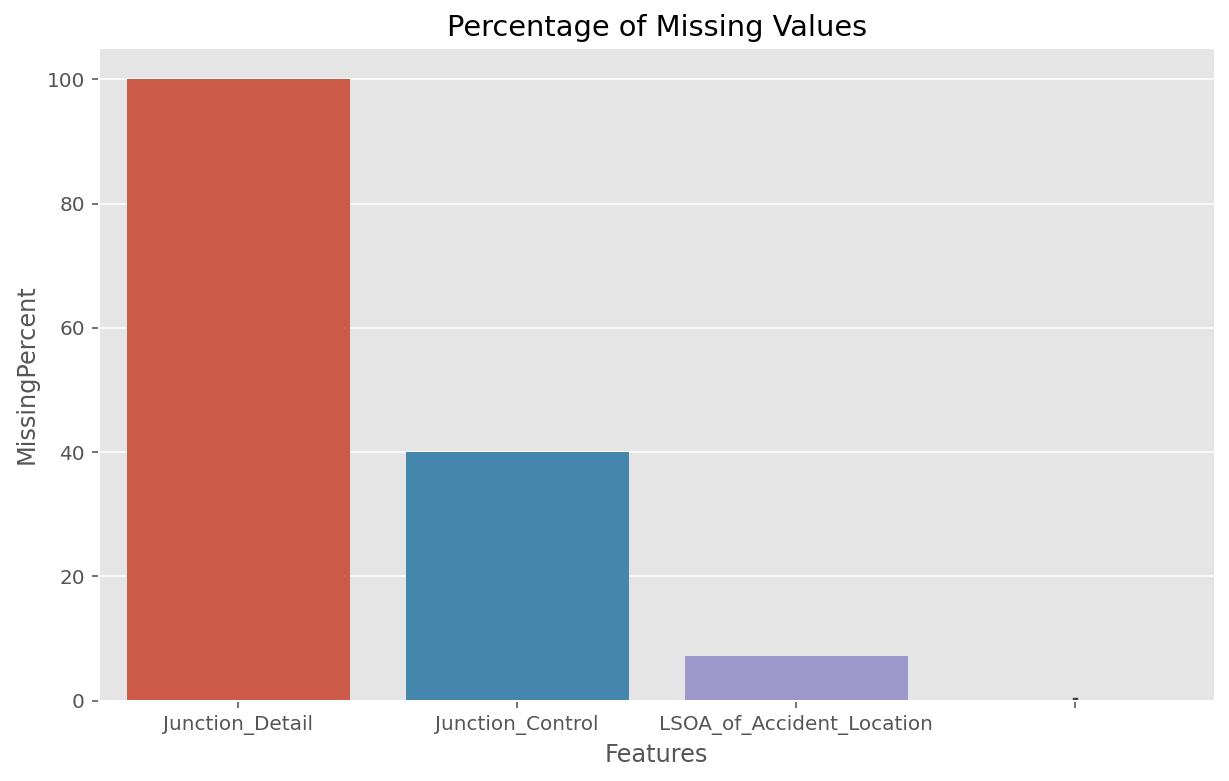

In [21]:
# Function to get missing values

# Function showing missing values in each column
def get_missings(df):
    labels,values = list(),list()
    threshold = 2
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                percentage = df[column].isnull().sum() / len(df[column])*100
                if percentage > threshold:
                    labels.append(column)
                else:
                    labels.append("") # Do not necesserialy see on the plot for tiny percentages.
                values.append(percentage)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent).set_title('Percentage of Missing Values')
        return missings
    else:
        return False

get_missings(accidents)

In [30]:
accidents_of_year =accidents['Year'].value_counts()
accidents_of_year

2005    198684
2006    189127
2007    182083
2012    179678
2009    163522
2010    154374
2011    151449
2014    146297
2013    138625
Name: Year, dtype: int64

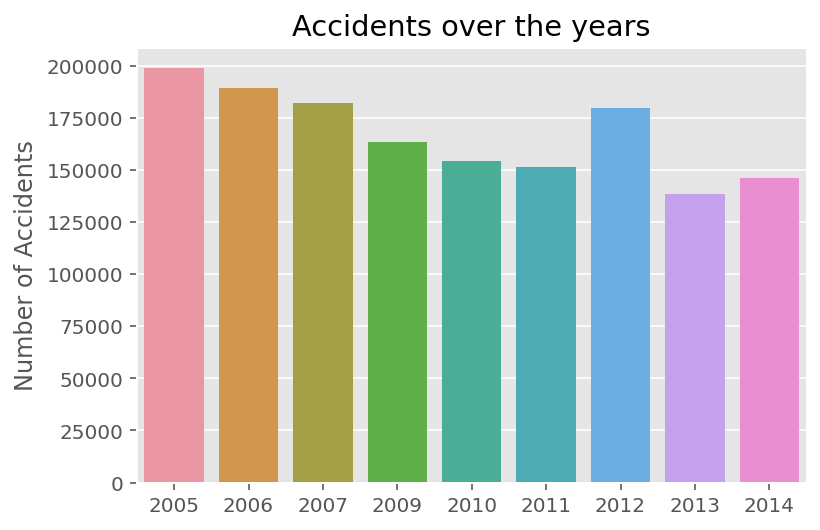

Mean:167093.22   Standard Deviation:21002.18


In [31]:
sns.barplot(x=accidents_of_year.index,y=accidents_of_year)
plt.ylabel("Number of Accidents")
plt.title("Accidents over the years")

plt.show()

print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(accidents_of_year.mean(), 
                                                      accidents_of_year.std()))

In [33]:
year_list = accidents['Year'].unique()
year_list

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [39]:
accidents[accidents["Year"]==2006]["Month"].unique()

array([ 1, 12,  3,  4, 10,  8, 11,  9,  2,  5,  7,  6], dtype=int64)

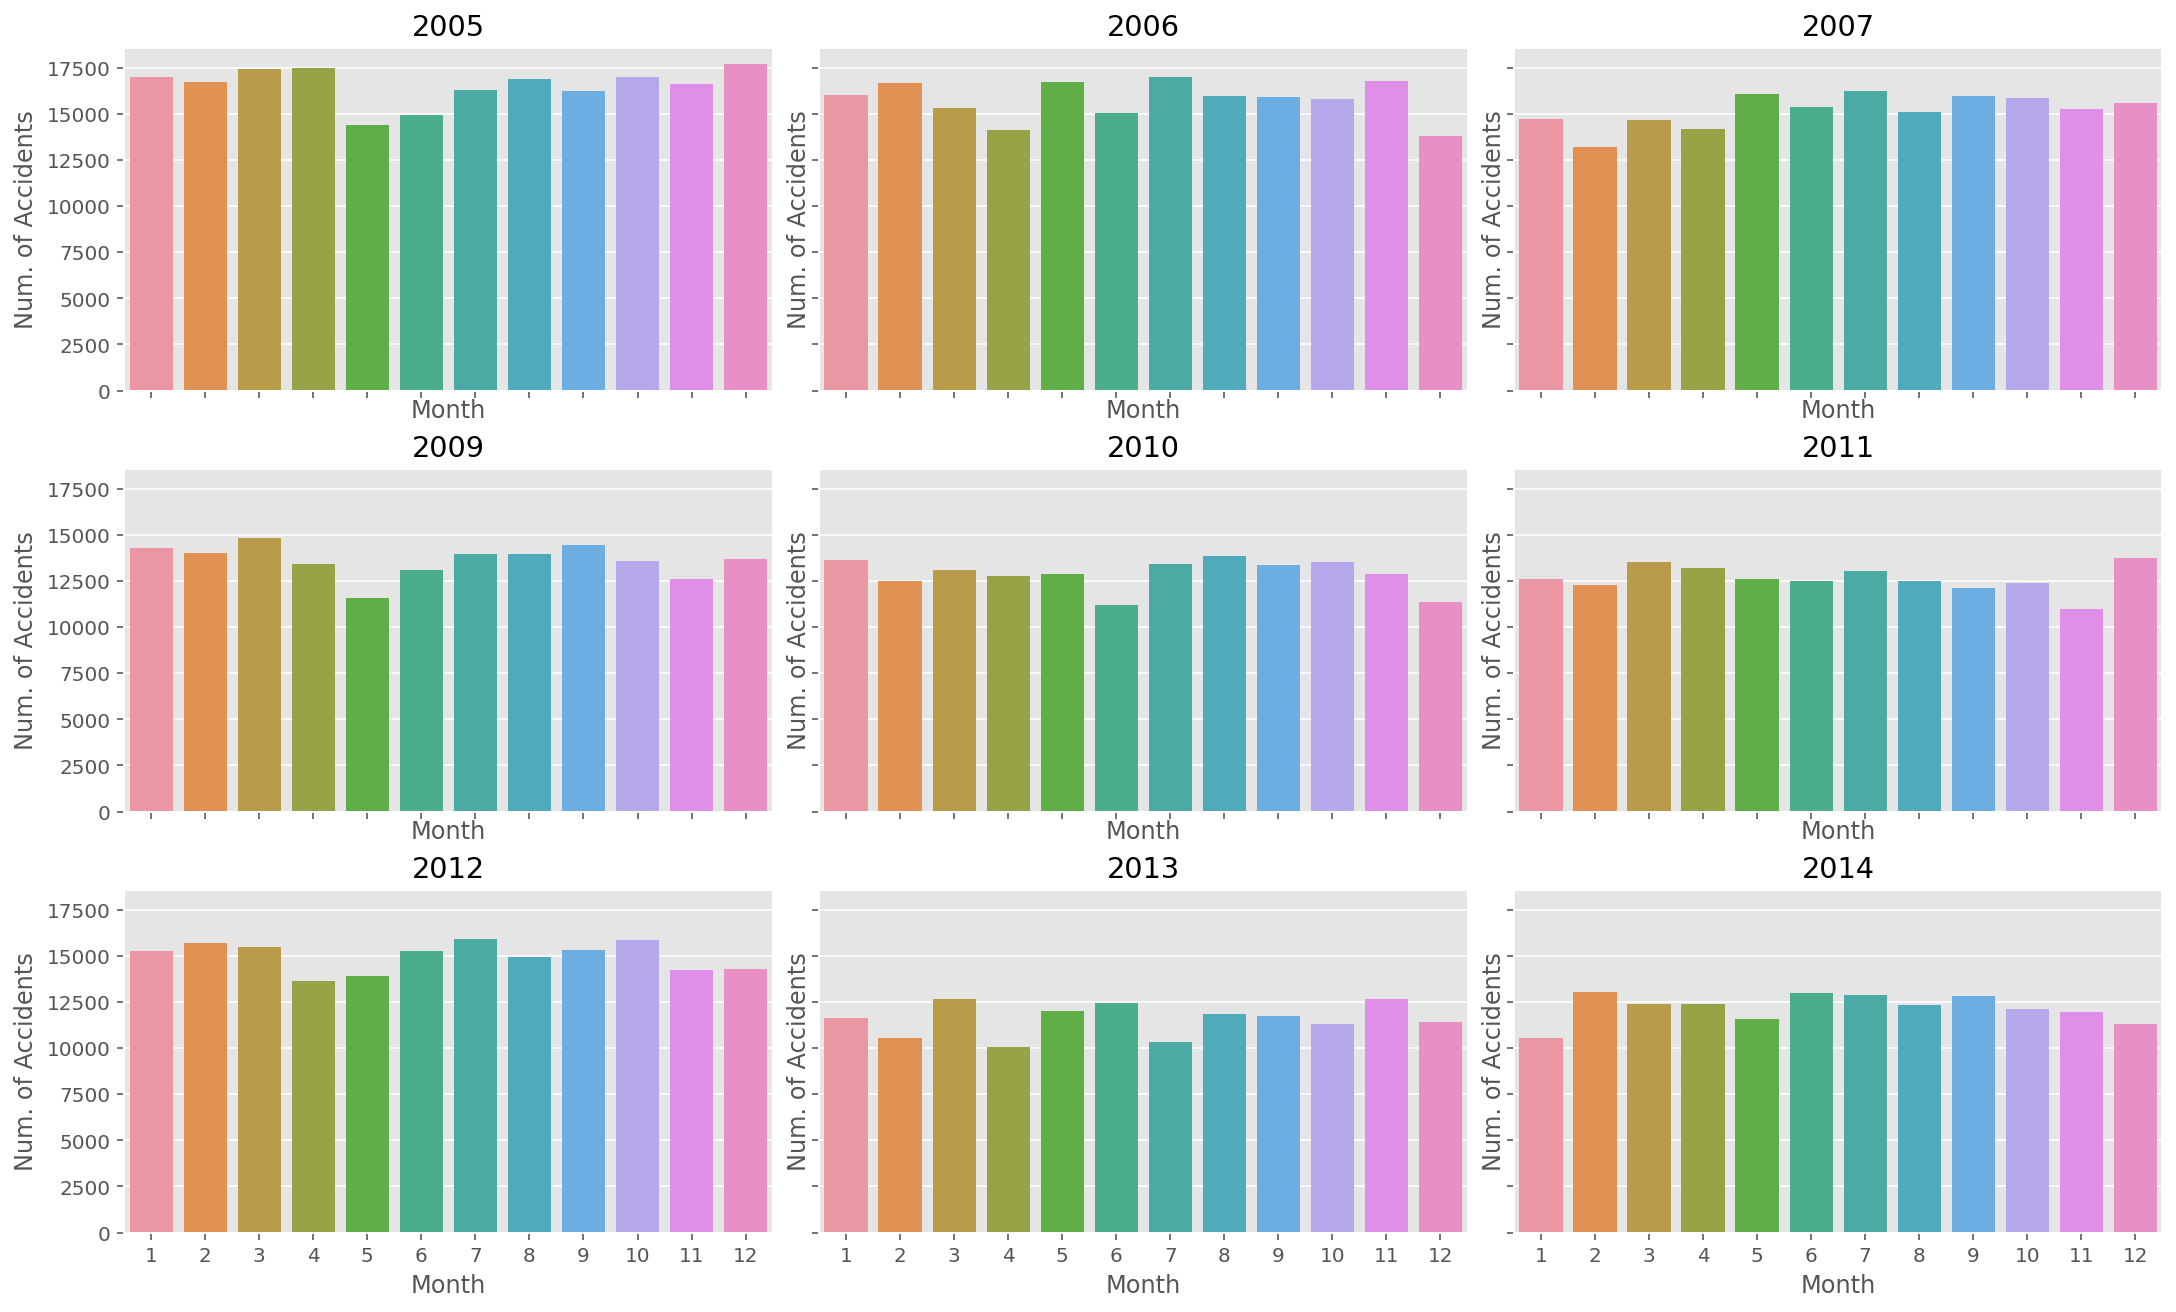

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, constrained_layout=True, figsize=(15,9))
year_index = 0
for rows in axs:
    for ax in rows:
        year = year_list[year_index]
        year_index += 1

        sns.barplot(ax=ax,x=accidents[accidents['Year']==year]["Month"].unique(),
                    y=accidents[accidents['Year']==year].groupby("Month")["Year"].count())
        
        ax.set_ylabel("Num. of Accidents")
        ax.set_xlabel("Month")
        ax.set_title(str(year))

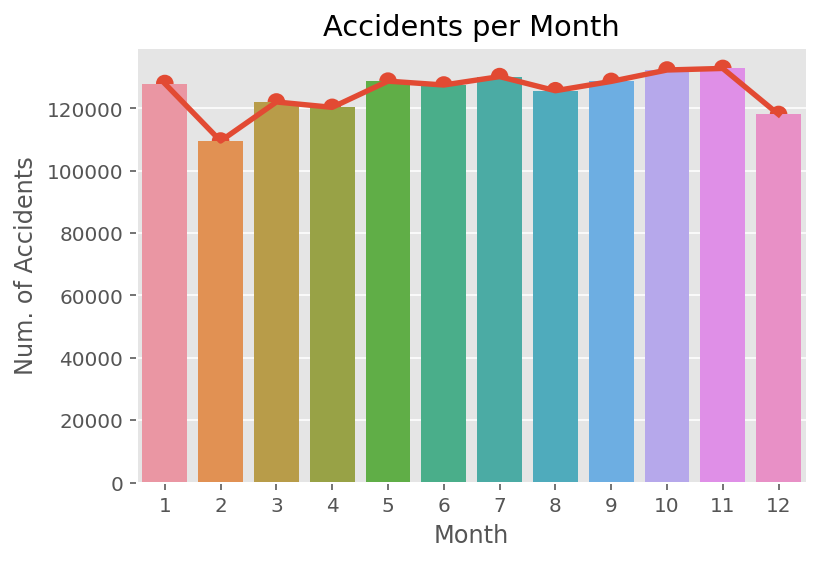


Mean:125319.92   Standard Deviation:6747.99



Month,1,2,3,4,5,6,7,8,9,10,11,12
Num. of Accidents,127974,109540,122059,120333,128738,127500,130196,125667,128656,132310,132815,118051


In [48]:
# Temporary df for visulaze
dfmonth = pd.DataFrame(accidents.groupby("Month")["Year"].count())
dfmonth = dfmonth.rename({"Year":"Num. of Accidents"}, axis=1)

sns.barplot(x = dfmonth.index, y = dfmonth["Num. of Accidents"])
sns.pointplot(x=dfmonth.index,y=dfmonth["Num. of Accidents"])
plt.title("Accidents per Month")
plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(dfmonth.mean().unique()), float(dfmonth.std().unique())))
dfmonth.T

In [49]:
accidents["Speed_limit"].unique()

array([30, 40, 50, 20, 60, 70, 10, 15], dtype=int64)

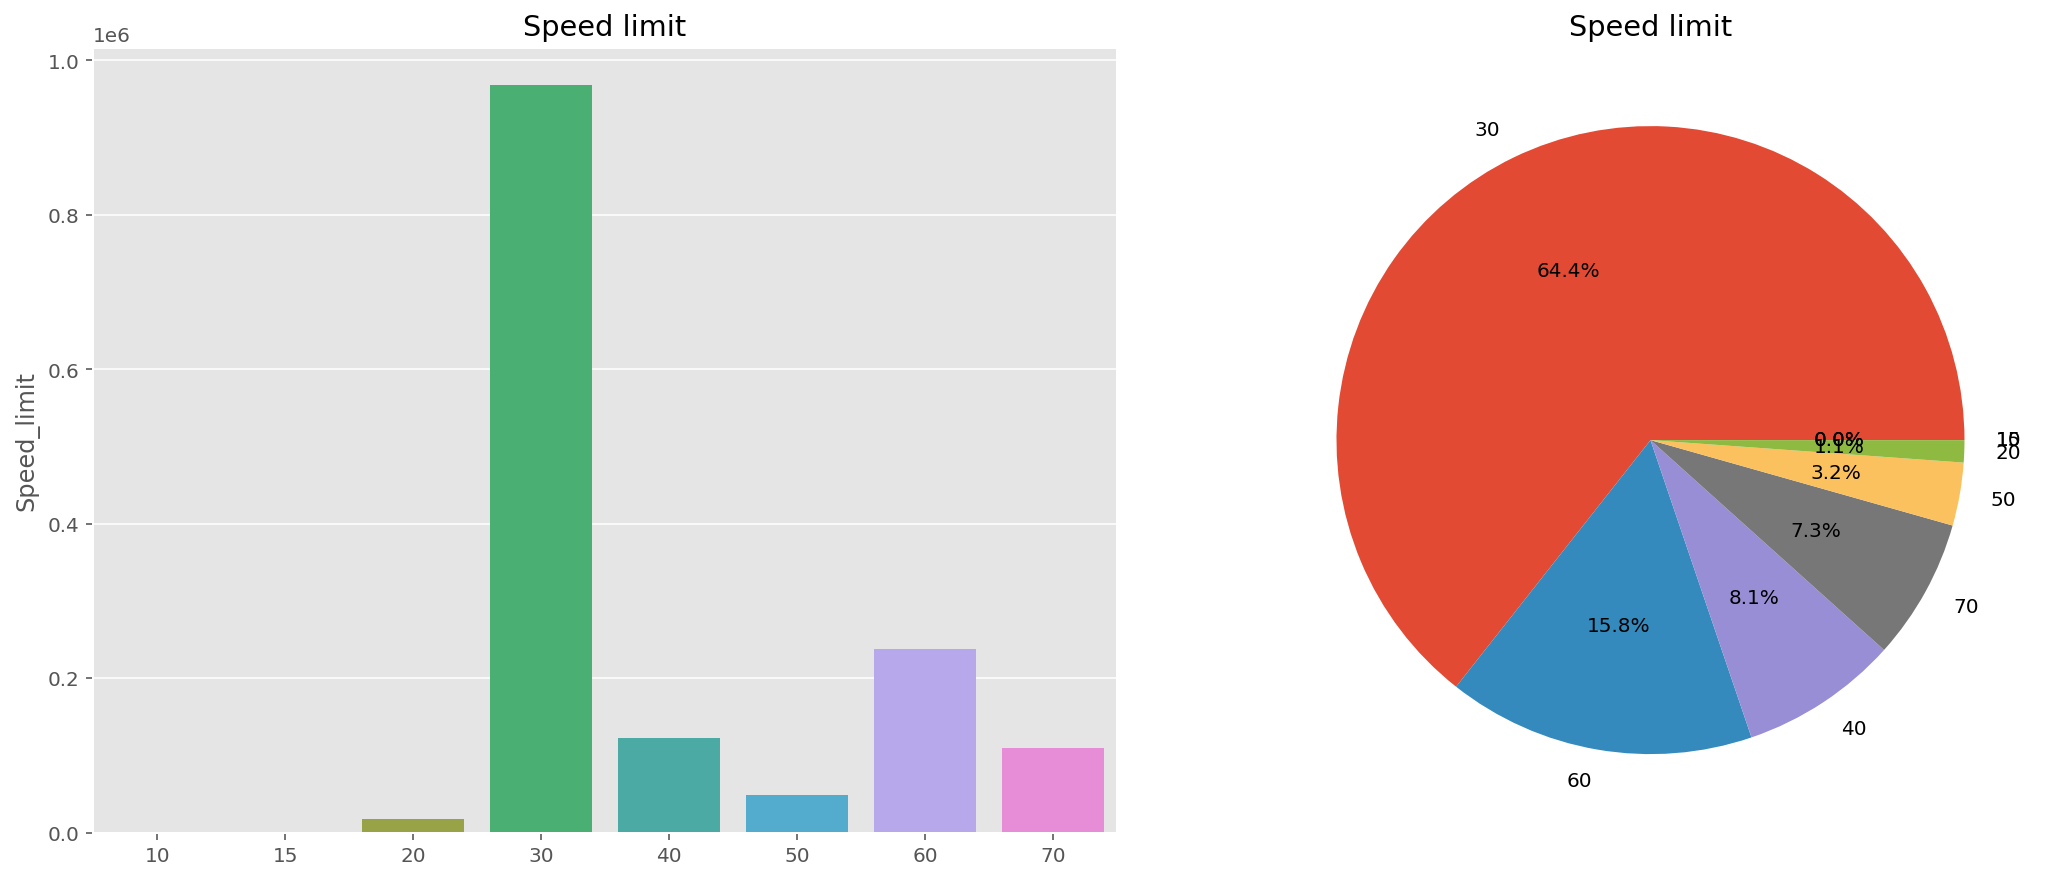

30    968094
60    238166
40    122376
70    109249
50     48778
20     17152
10        14
15        10
Name: Speed_limit, dtype: int64

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
speed = accidents["Speed_limit"].value_counts()

sns.barplot(ax=axs[0], x = speed.index, y = speed)
axs[0].set_title("Speed limit")

axs[1].pie(speed, labels=speed.index, autopct='%1.1f%%')
axs[1].set_title("Speed limit")

plt.show()

speed

## Get the location of accidents

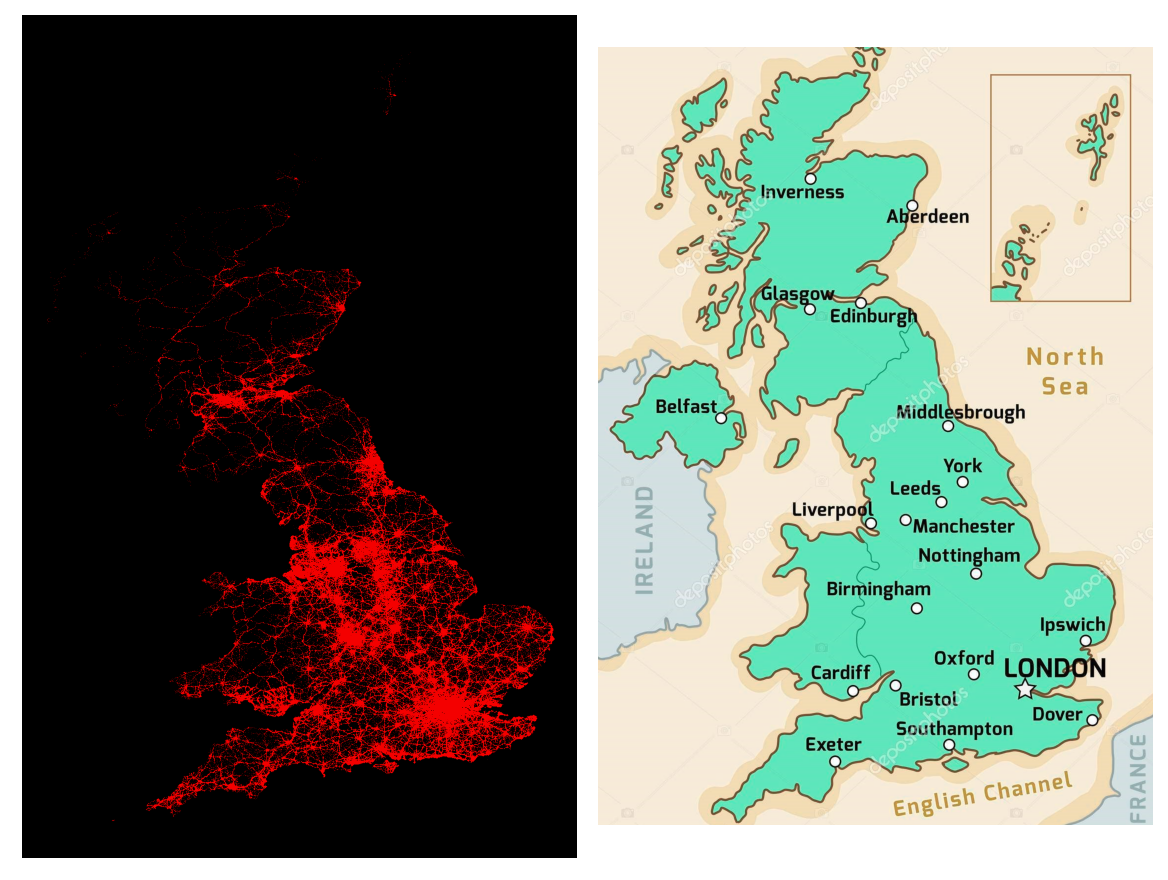

In [101]:
import cv2
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8,6))

axs[0].grid(False)
axs[0].set_facecolor("black")
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].scatter(x = accidents["Longitude"], y = accidents["Latitude"],s=0.005, alpha= 0.25, color="red")
#axs[].title("UK Accidents 2005-2014 (except 2008)")
map = cv2.imread("uk_map.jpg")
axs[1].imshow(map)
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
plt.show()

With this map we udnerstand in London there is much more accidents than other parts of UK. Also in Liverpool Manchester and York has more accidents than the other parts of London.
##### Note: To make better map Folium library will help you but it can take long time to run.

* Kırsal ve Kentsele bölerek verileri kaza sonuçlarını gözlemle

En çok kaza olan yerlere bakacak olursak neredeyse hepsi kentsel bölgelerde yer almaktadır buda kırsal bölgelerin kentsel bölgelere göre daha az kaza oranı olduğunu bize söyler. 

## Coverience

In [144]:
dfspeed = pd.DataFrame(accidents.groupby("Speed_limit")["Speed_limit"].count())
dfspeed.reset_index(drop=True,inplace=True)
dfspeed.rename(columns = {'Speed_limit':'NumberOfAccidents'}, inplace = True)
dfspeed["Speed_limit"] = accidents["Speed_limit"].unique()
#dfspeed = dfspeed.rename(columns = {'index':'SpeedLimit','Speed_limit':'NumberOfAccidents'}) 
result=dfspeed.cov()
result


,NumberOfAccidents,Speed_limit
NumberOfAccidents,1.058318e+11,-2.922335e+06
Speed_limit,-2.922335e+06,4.781250e+02


Because of covarience is negatif then we can say that the number of accidents will decrease if the speed limit is higher

In [135]:
dfspeed

,NumberOfAccidents,Speed_limit
0,14,30
1,10,40
2,17152,50
3,968094,20
4,122376,60
5,48778,70
6,238166,10
7,109249,15


To calculate coverience we have to get just int and float values I mean just numbers not categorical or string values and not objects generally. So we are going to drop the values that are not numbers.

In [146]:
query = (accidents.dtypes == np.float64) | (accidents.dtypes == np.int64) 
accident_coverience = accidents.loc[:, query]
accident_coverience

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,Hour,Month
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,3,12,3,3218,30,NaN,-1,0,1,2005,17,4
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,4,12,4,450,30,NaN,5,0,1,2005,17,5
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,5,12,5,0,30,NaN,-1,0,1,2005,0,6
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,6,12,3,3220,30,NaN,-1,0,1,2005,10,7
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,2,12,6,0,30,NaN,-1,0,1,2005,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,1,917,2,74,70,NaN,-1,0,2,2014,22,7
464693,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,5,917,2,74,70,NaN,-1,0,2,2014,6,11
464694,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,3,917,4,721,40,NaN,-1,0,2,2014,2,9
464695,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,4,917,3,75,60,NaN,5,43,2,2014,6,12


,Features,MissingPercent
4,Junction_Detail,100.000000
0,,0.006716
1,,0.006716
2,,0.006716
3,,0.006716


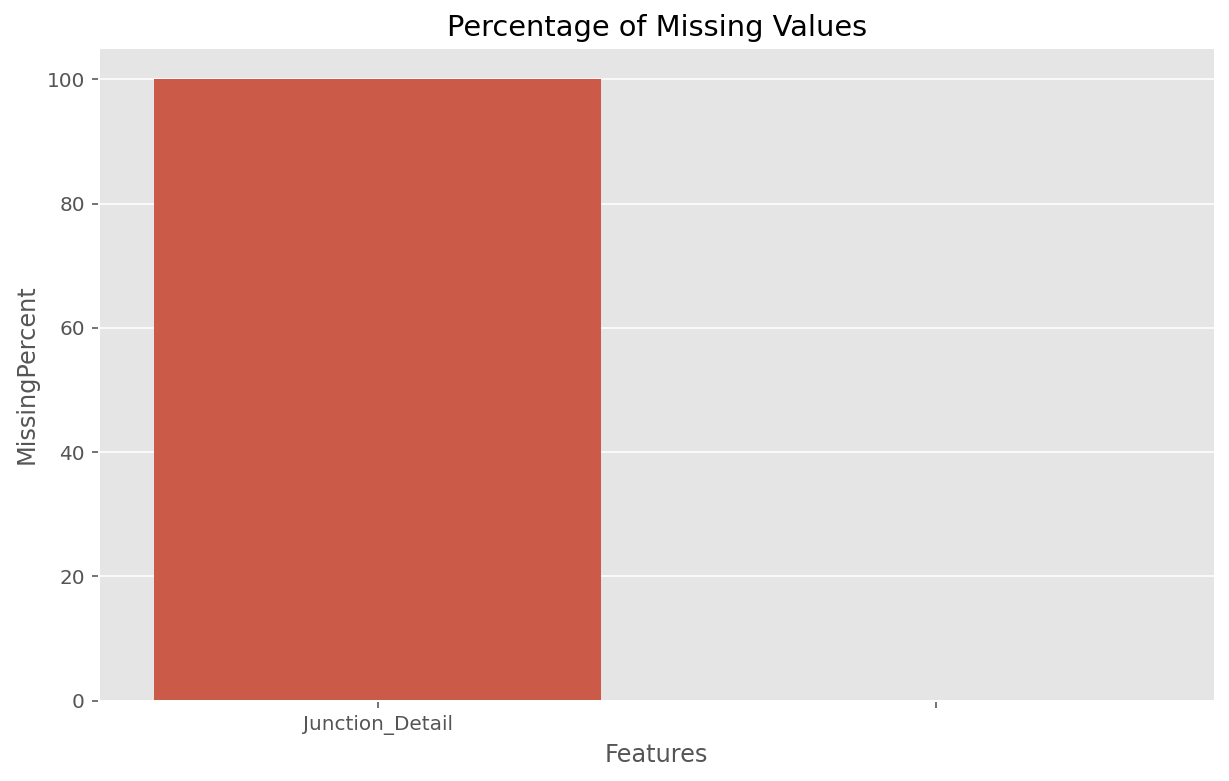

In [147]:
get_missings(accident_coverience)

In [149]:
accident_coverience.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit', 'Junction_Detail',
       '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Year',
       'Hour', 'Month'],
      dtype='object')

Now we are going to clean our dataframe from unnecassary columns while calculating coverience.

In [163]:
accident_coverience_cleaned =accident_coverience.drop(columns=['Longitude','Latitude','Day_of_Week','Year',
                                                                'Hour','Month','Junction_Detail','Location_Easting_OSGR',
                                                                'Location_Northing_OSGR','Local_Authority_(District)','Urban_or_Rural_Area'])
accident_coverience_cleaned

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number
0,1,2,1,1,3,3218,30,-1,0
1,1,3,1,1,4,450,30,5,0
2,1,3,2,1,5,0,30,-1,0
3,1,3,1,1,3,3220,30,-1,0
4,1,3,1,1,6,0,30,-1,0
...,...,...,...,...,...,...,...,...,...
464692,98,2,2,1,2,74,70,-1,0
464693,98,3,2,2,2,74,70,-1,0
464694,98,3,1,1,4,721,40,-1,0
464695,98,2,3,2,3,75,60,5,43


In [174]:
def calculate_converience(df):
    for n,c in df.items():
        df[n] = c
        temp_df = pd.DataFrame(df.groupby(n)[n].count())
        temp_df.reset_index(drop=True,inplace=True)
        temp_df.rename(columns = {f'{n}':'NumberOfAccidents'}, inplace = True)
        temp_df[n] = df[n].unique()
        result = temp_df.cov().iloc[0,1]
        print("Coverience: ",result)
        if result < 0 : 
            print(f"High {n} makes accidents rate less.")
        else:
            print(f"High {n} makes accidents rate more.")

In [175]:
calculate_converience(accident_coverience_cleaned)

Coverience:  -365295.43450980383
High Police_Force makes accidents rate less.
Coverience:  -537742.0
High Accident_Severity makes accidents rate less.
Coverience:  -839389.8903133901
High Number_of_Vehicles makes accidents rate less.
Coverience:  -904631.8450508784
High Number_of_Casualties makes accidents rate less.
Coverience:  98824.90000000001
High 1st_Road_Class makes accidents rate more.
Coverience:  -470878.53750795545
High 1st_Road_Number makes accidents rate less.
Coverience:  -2922335.4464285714
High Speed_limit makes accidents rate less.
Coverience:  -468644.3095238096
High 2nd_Road_Class makes accidents rate less.
Coverience:  -713156.0631168877
High 2nd_Road_Number makes accidents rate less.


In [183]:
def plot_feature_and_accident_count(feature_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
    speed = accidents[feature_name].value_counts()

    sns.barplot(ax=axs[0], x = speed.index, y = speed)
    axs[0].set_title(feature_name)

    axs[1].pie(speed, labels=speed.index, autopct='%1.1f%%')
    axs[1].set_title(feature_name)

    plt.show()

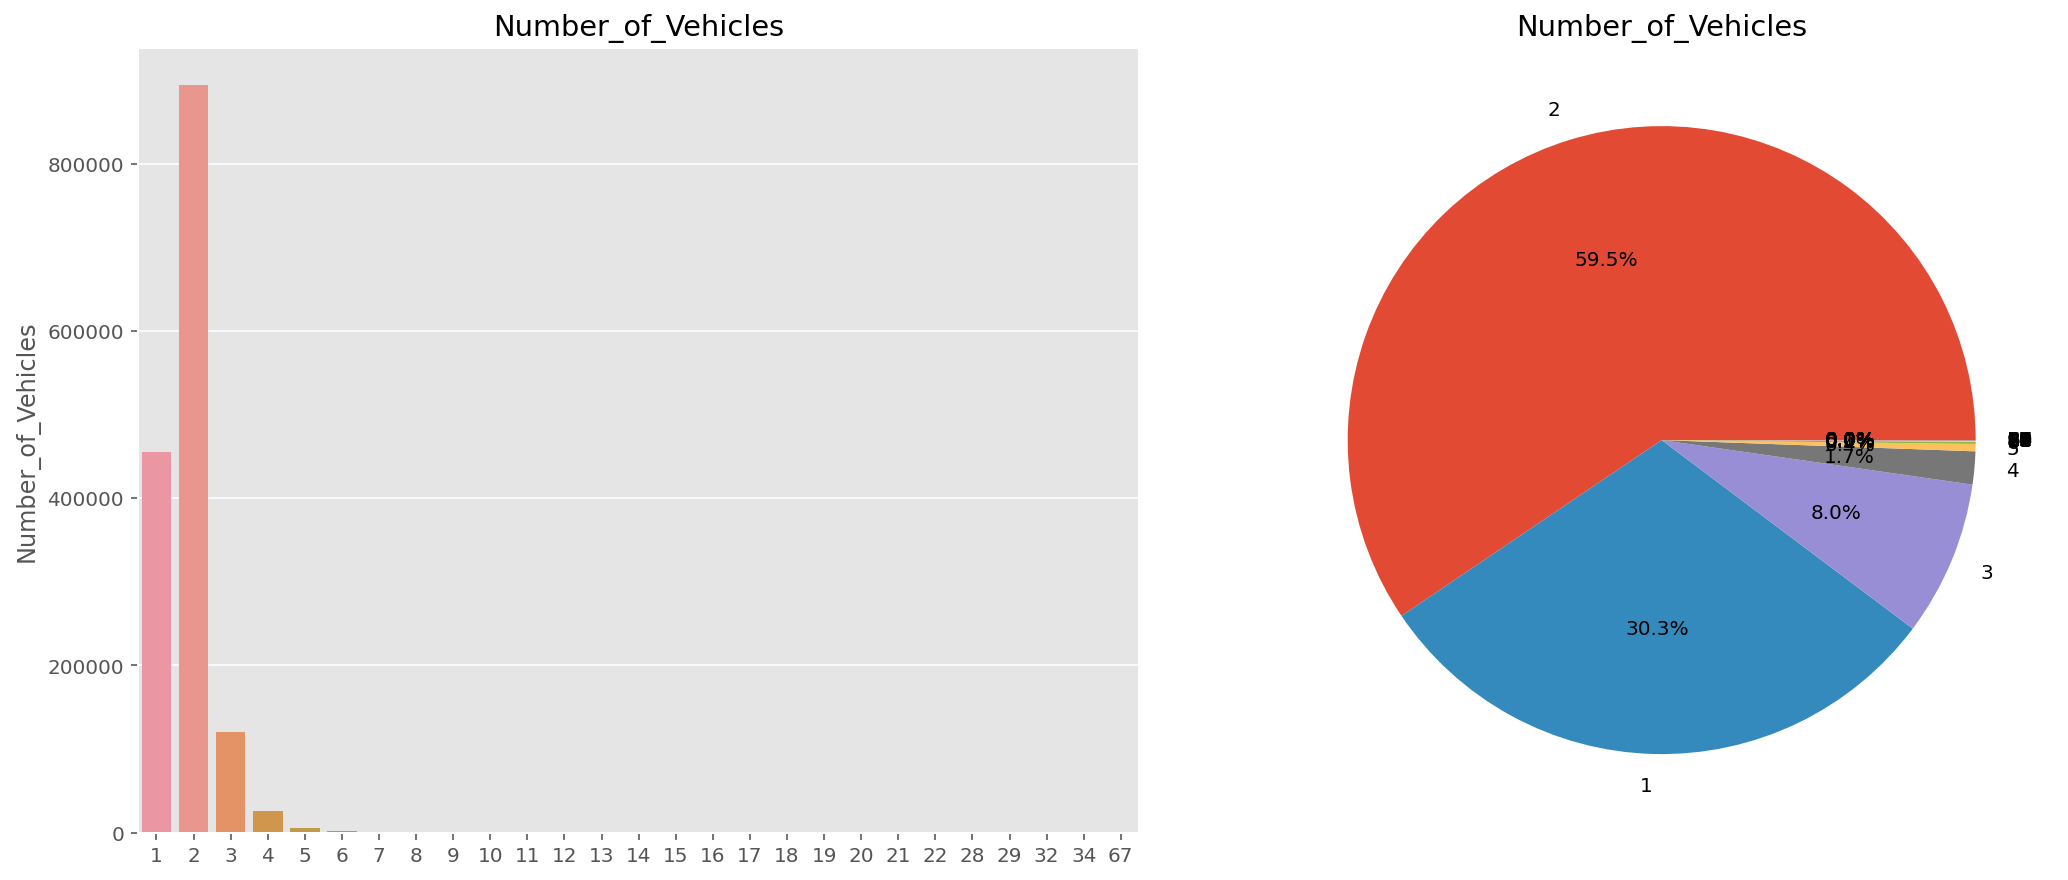

In [186]:
plot_feature_and_accident_count("Number_of_Vehicles")

* Crashing between two cars has the highest possibility for an accident to happen

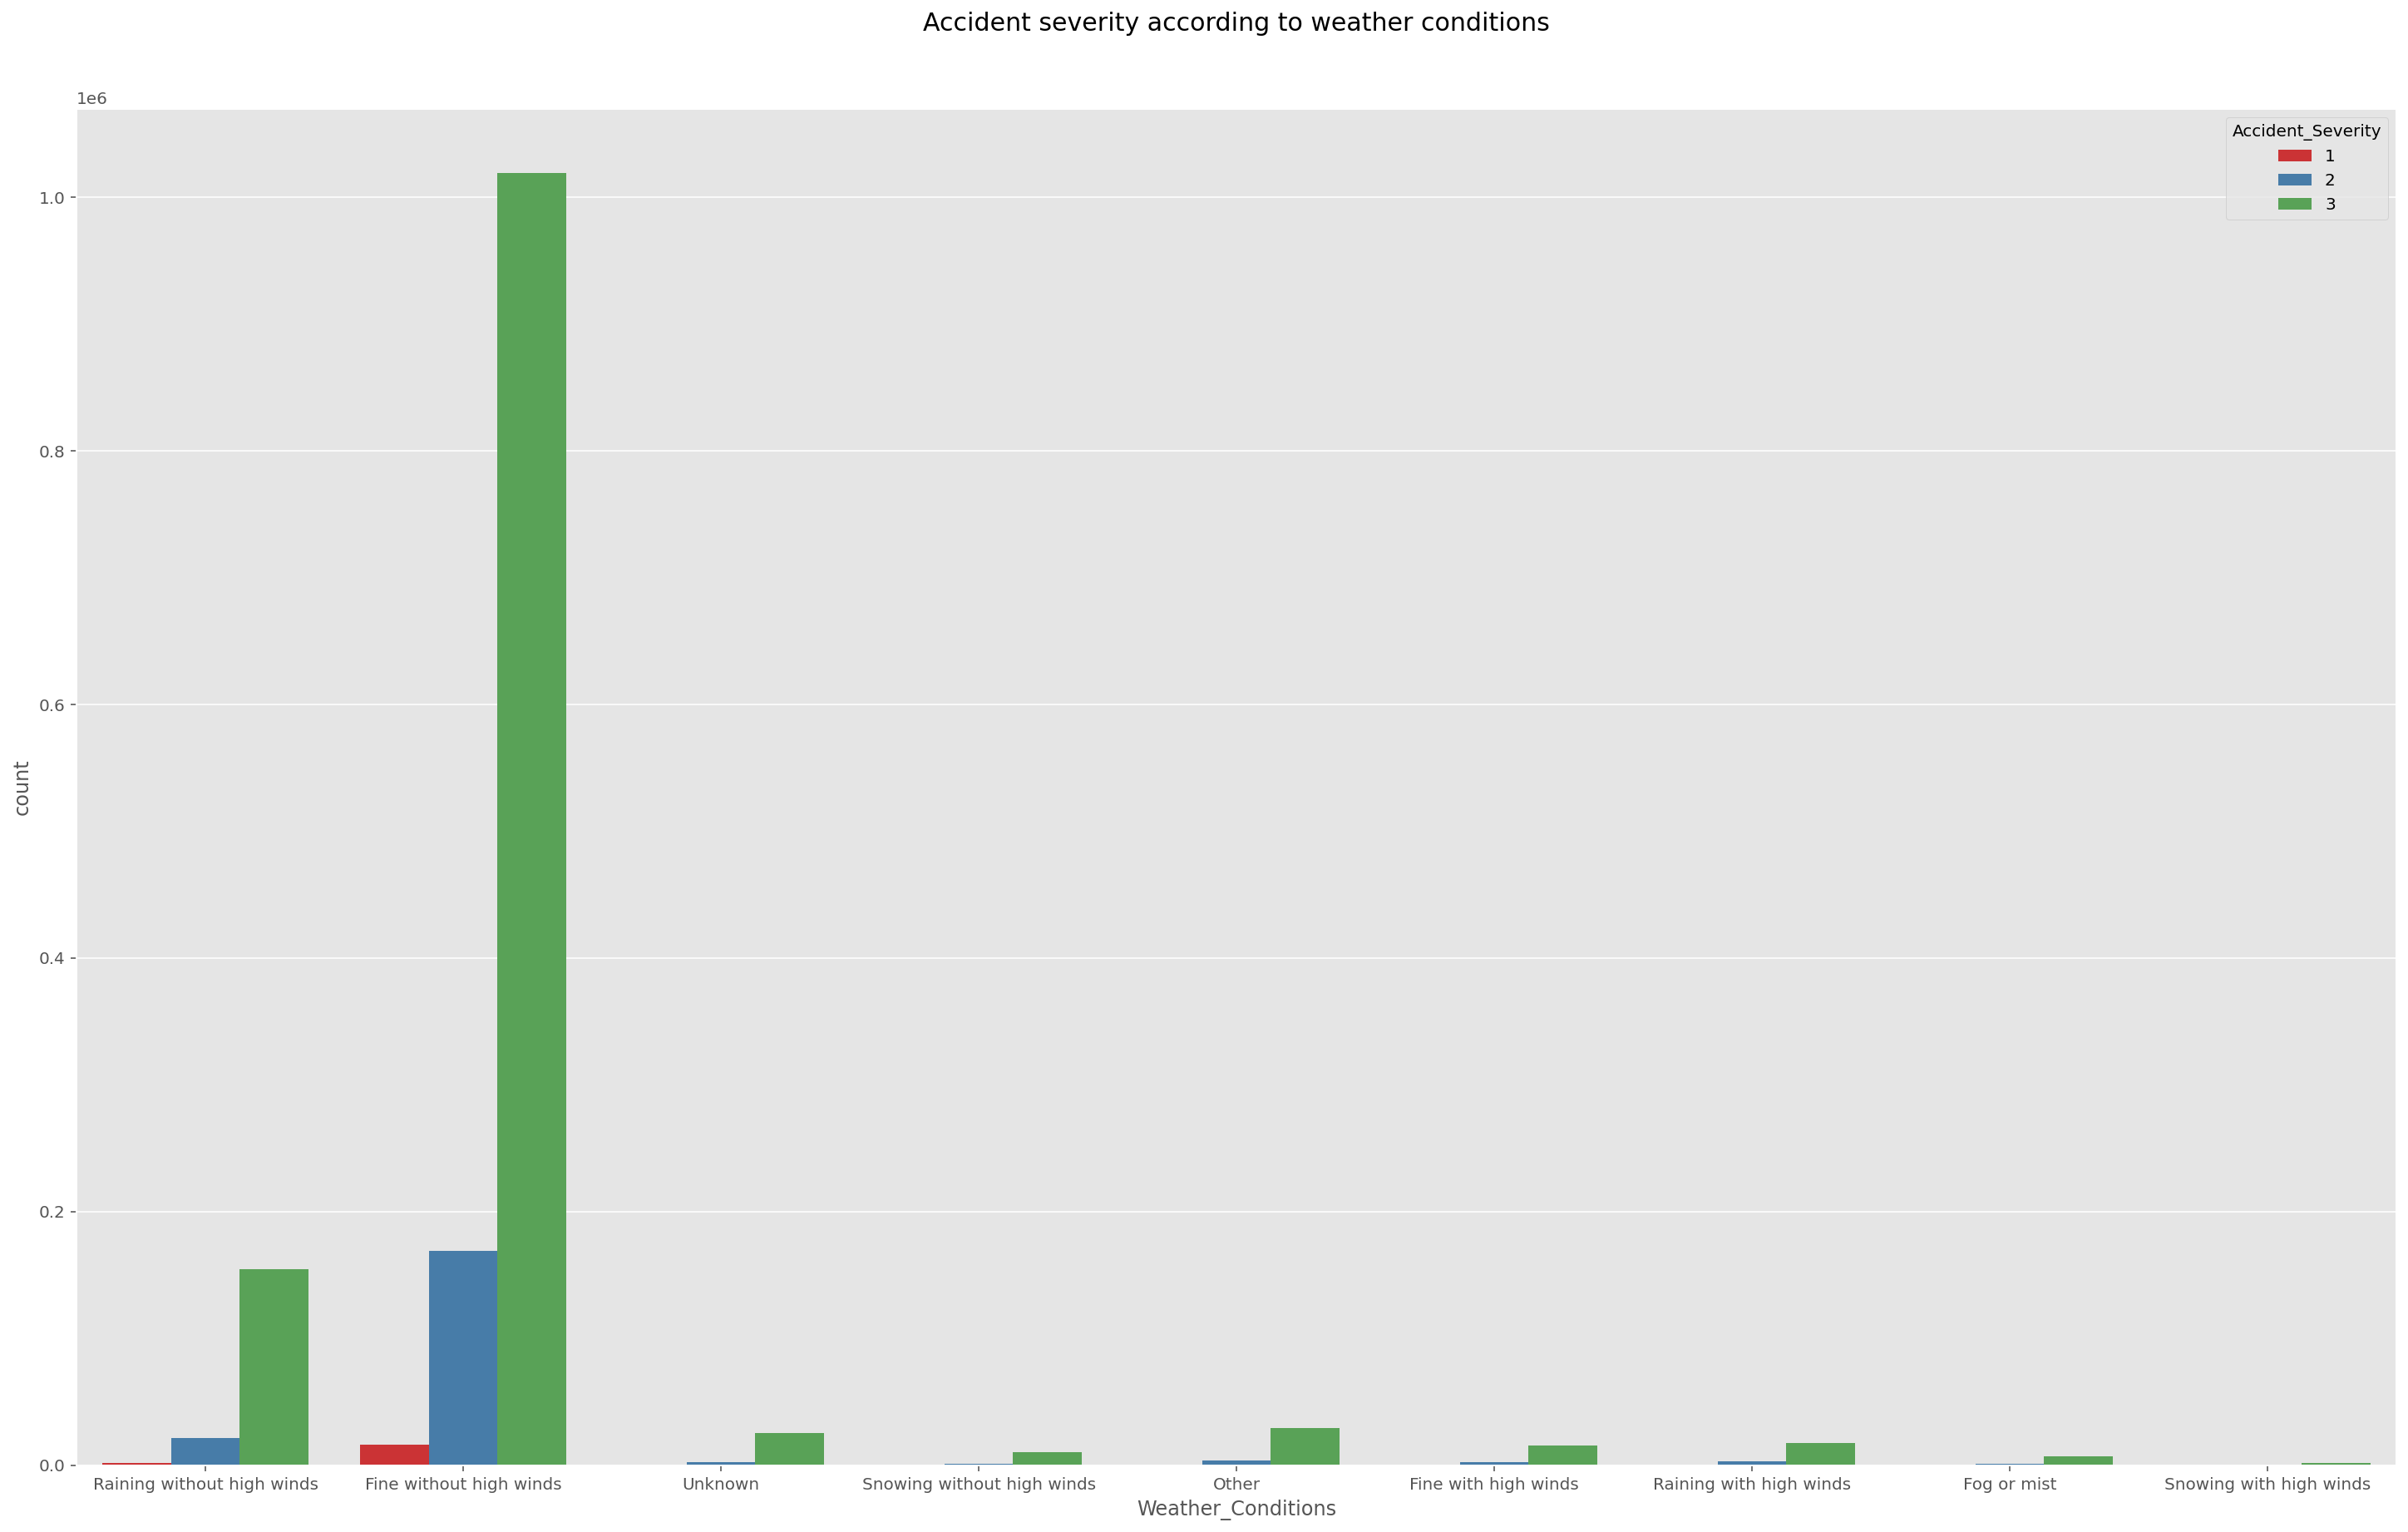

In [194]:
plt.figure(figsize=(25,15))
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=accidents ,palette="Set1")
plt.title('Accident severity according to weather conditions', size=15, y=1.05)
plt.show()

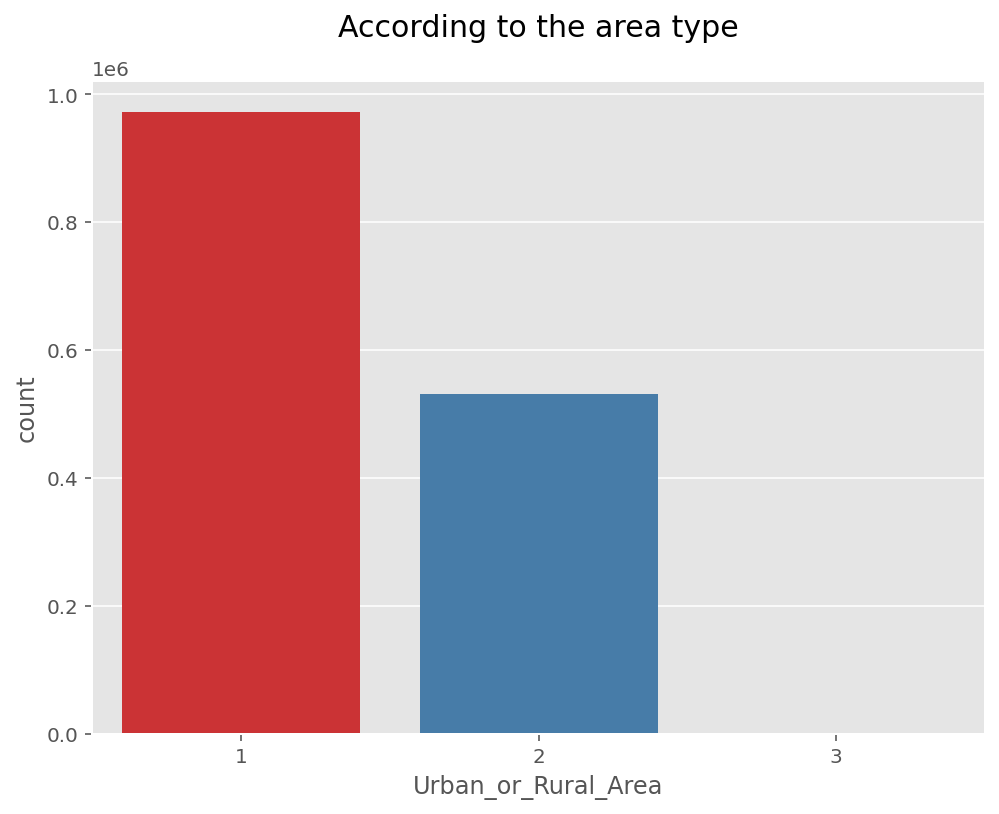

In [196]:
plt.figure(figsize=(8,6))
sns.countplot(x='Urban_or_Rural_Area', data=accidents ,palette="Set1")
plt.title('According to the area type', size=15, y=1.05)
plt.show()

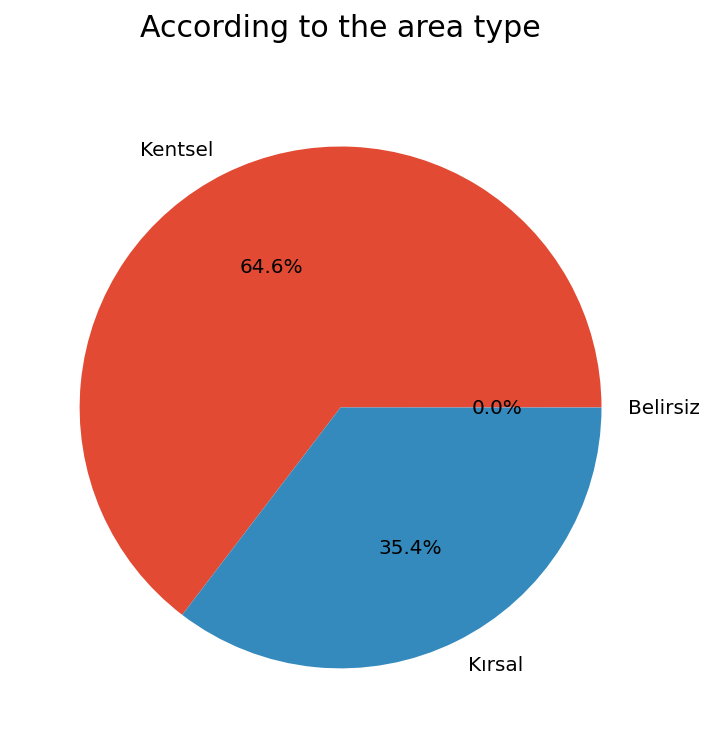

In [199]:
accidents["Urban_or_Rural_Area"].replace({1: "Kentsel", 2: "Kırsal", 3: "Belirsiz"}, inplace=True)
plt.figure(figsize=(8,6))
area_type = accidents["Urban_or_Rural_Area"].value_counts()
plt.pie(area_type, labels=area_type.index, autopct='%1.1f%%')
plt.title('According to the area type', size=15, y=1.05)
plt.show()

### Correlation

In [202]:
corr_matrix = accident_coverience_cleaned.corr()
corr_matrix

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number
Police_Force,1.000000,-0.031695,-0.015454,0.007123,0.044887,-0.000224,0.197983,-0.119029,-0.018247
Accident_Severity,-0.031695,1.000000,0.075958,-0.083548,0.012750,-0.004053,-0.079075,0.064323,0.026128
Number_of_Vehicles,-0.015454,0.075958,1.000000,0.237350,-0.142315,-0.008880,0.084825,0.068613,0.024325
Number_of_Casualties,0.007123,-0.083548,0.237350,1.000000,-0.082982,0.007755,0.139554,-0.029221,0.001987
1st_Road_Class,0.044887,0.012750,-0.142315,-0.082982,1.000000,-0.089215,-0.389879,0.103466,-0.033918
1st_Road_Number,-0.000224,-0.004053,-0.008880,0.007755,-0.089215,1.000000,-0.064927,0.035876,0.183907
Speed_limit,0.197983,-0.079075,0.084825,0.139554,-0.389879,-0.064927,1.000000,-0.334411,-0.052519
2nd_Road_Class,-0.119029,0.064323,0.068613,-0.029221,0.103466,0.035876,-0.334411,1.000000,0.157100
2nd_Road_Number,-0.018247,0.026128,0.024325,0.001987,-0.033918,0.183907,-0.052519,0.157100,1.000000


<BarContainer object of 6 artists>

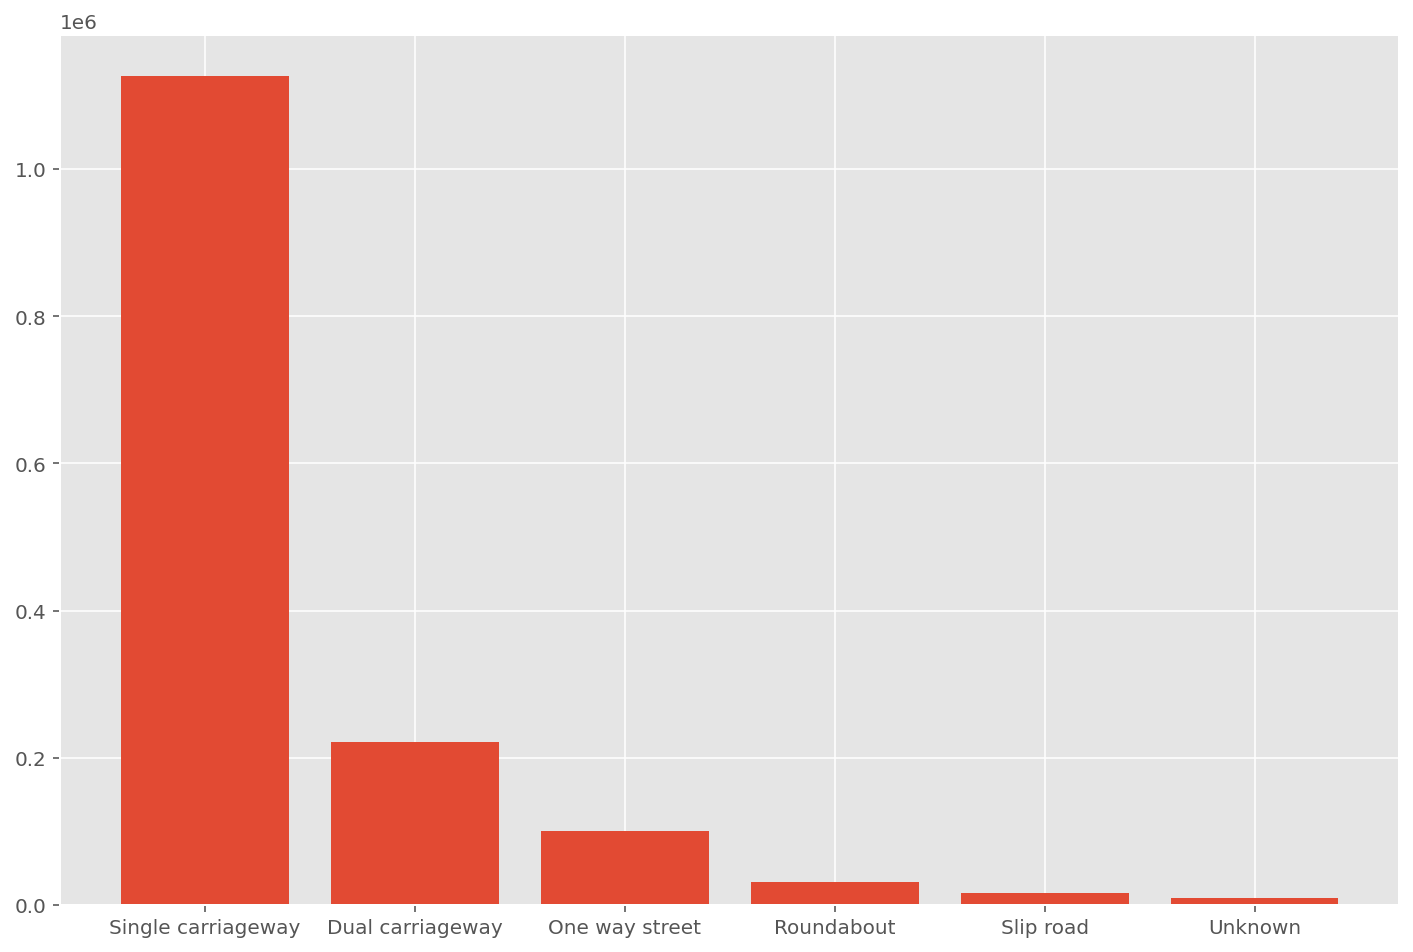

In [207]:
labels = accidents.Road_Type.values
labels = pd.unique(labels)
sizes = accidents.Road_Type.value_counts()
plt.figure(figsize=(12,8))
plt.bar(labels, sizes)

<BarContainer object of 5 artists>

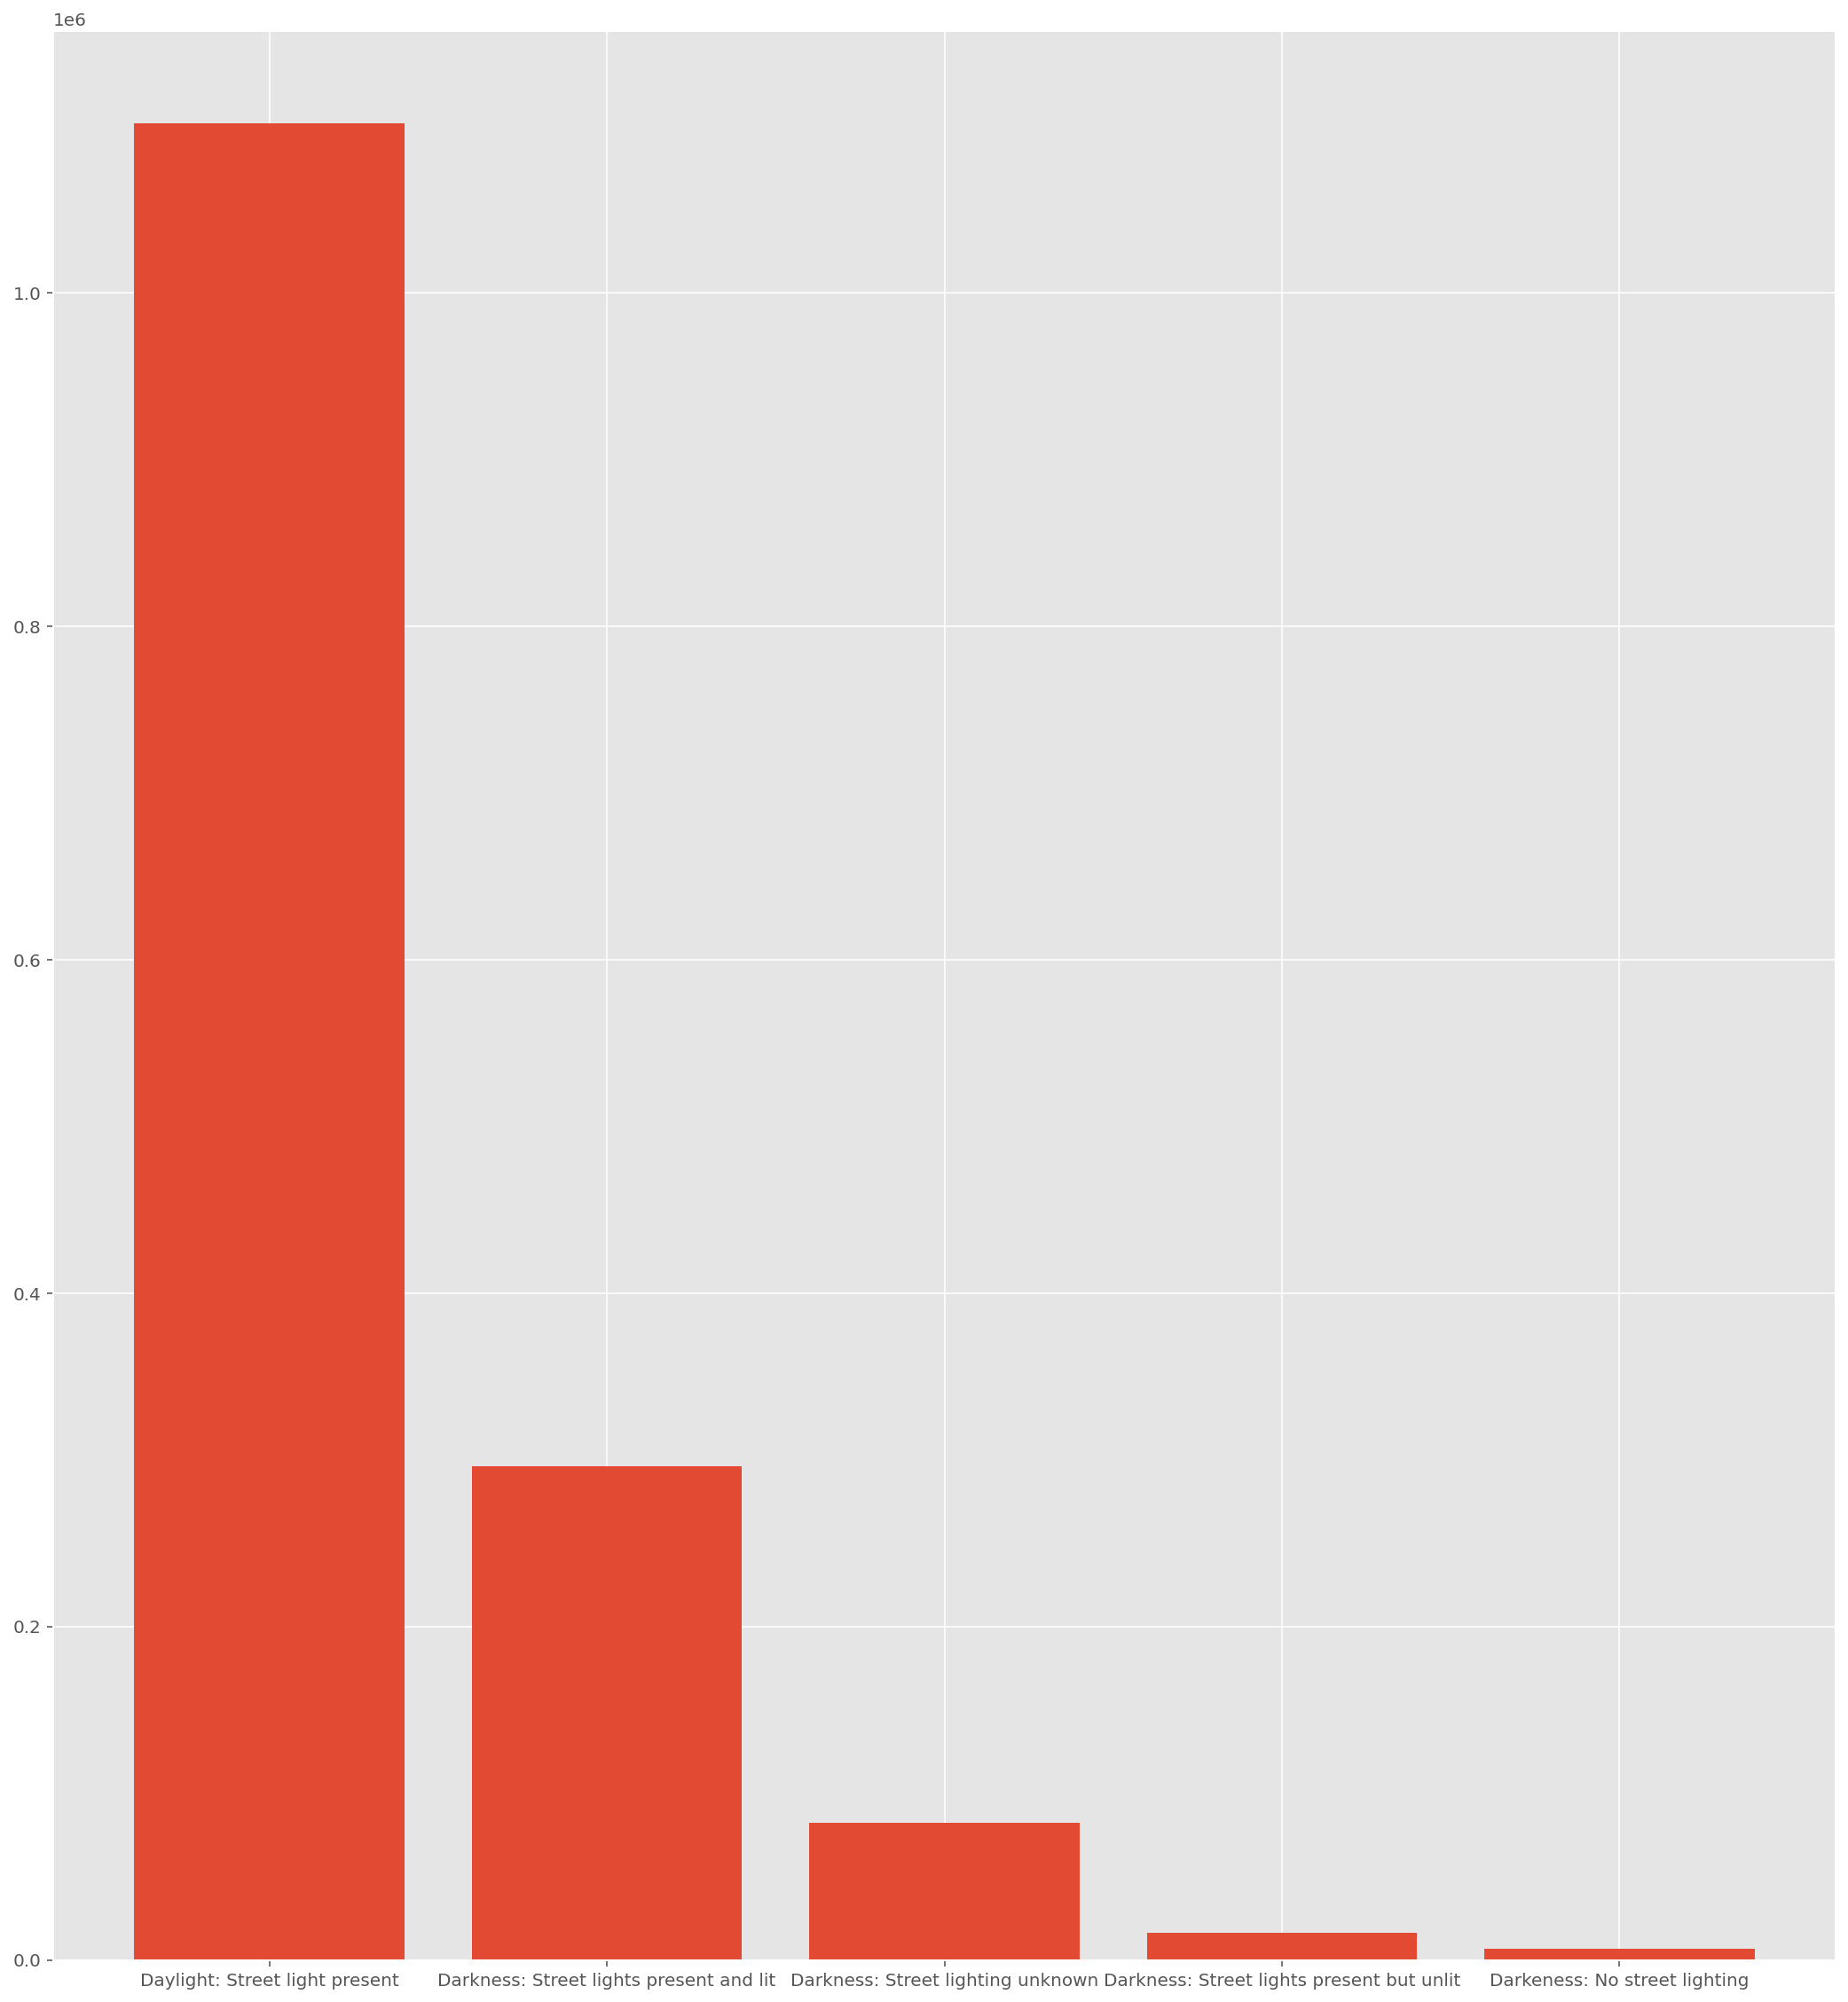

In [214]:
labels = accidents.Light_Conditions.values
labels = pd.unique(labels)
sizes = accidents.Light_Conditions.value_counts()
plt.figure(figsize=(18,20))
plt.bar(labels, sizes)

### Create model

In [215]:
accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Hour', 'Month'],
      dtype='object')

In [235]:
columns_to_drop = ['Accident_Index','Junction_Detail','Junction_Control','LSOA_of_Accident_Location',
                   'Location_Easting_OSGR', 'Location_Northing_OSGR','Local_Authority_(District)', 
                   'Local_Authority_(Highway)','Time']
accident_predict = accidents.drop(columns=columns_to_drop)

In [236]:
accident_predict=accident_predict.sort_values(by='Year')
accident_predict.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,1st_Road_Class,1st_Road_Number,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Hour,Month
0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,3,3218,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Kentsel,Yes,2005,17,4
132465,-1.203938,51.949020,43,3,1,1,04/03/2005,6,3,43,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,Kırsal,Yes,2005,15,4
132466,-1.409447,51.822375,43,3,3,1,06/05/2005,6,3,4095,...,Daylight: Street light present,Fine without high winds,Dry,None,None,Kırsal,Yes,2005,7,6
132467,-1.290575,51.612217,43,3,1,1,04/07/2005,2,3,34,...,Daylight: Street light present,Fine without high winds,Dry,None,None,Kırsal,Yes,2005,11,4
132468,-1.361823,52.060571,43,3,1,1,06/08/2005,7,6,120,...,Daylight: Street light present,Fine without high winds,Dry,None,None,Kentsel,Yes,2005,17,6


Encode categrical values

In [237]:
def categorize(df):
    for n,c in df.items():
        if pd.api.types.is_string_dtype(c): # if value is a string in train data
            df[n] = c.astype("category").cat.as_ordered() # categorize the value

In [238]:
categorize(accident_predict)

In [240]:
accident_predict.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,1st_Road_Class,1st_Road_Number,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Hour,Month
0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,3,3218,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Kentsel,Yes,2005,17,4
132465,-1.203938,51.949020,43,3,1,1,04/03/2005,6,3,43,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,Kırsal,Yes,2005,15,4
132466,-1.409447,51.822375,43,3,3,1,06/05/2005,6,3,4095,...,Daylight: Street light present,Fine without high winds,Dry,None,None,Kırsal,Yes,2005,7,6
132467,-1.290575,51.612217,43,3,1,1,04/07/2005,2,3,34,...,Daylight: Street light present,Fine without high winds,Dry,None,None,Kırsal,Yes,2005,11,4
132468,-1.361823,52.060571,43,3,1,1,06/08/2005,7,6,120,...,Daylight: Street light present,Fine without high winds,Dry,None,None,Kentsel,Yes,2005,17,6


In [259]:
def numericalize(df,col,name):
    if not pd.api.types.is_numeric_dtype(col):
        df[name] = col.cat.codes + 1

In [260]:
def fix_missing(df,col,name):
    if pd.api.types.is_numeric_dtype(col):
        df[name] = col.fillna(df[name].median())

In [261]:
def proc_df(df):
    
    df = df.copy()
    for n, c in df.items():
        fix_missing(df,c,n)
        numericalize(df,c,n)
    
    return df

In [262]:
datas = proc_df(accident_predict)

In [270]:
len(datas)

1503839

In [265]:
X = datas.drop(columns=["Accident_Severity"])
y = datas['Accident_Severity']

In [275]:
train_X = X[:1000000]
test_X = X[1000000:]
train_Y = y[:1000000]
test_Y = y[1000000:]

In [276]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(train_X,train_Y)


LogisticRegression()

In [277]:
prediction_lr = reg.predict(test_X)
print(prediction_lr)

[3 3 3 ... 3 3 3]


In [278]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, prediction_lr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5764
           2       0.00      0.00      0.00     72054
           3       0.85      1.00      0.92    426021

    accuracy                           0.85    503839
   macro avg       0.28      0.33      0.31    503839
weighted avg       0.71      0.85      0.77    503839



In this notebook my purpose was not to build model rather than I want to visualize the data and answering some question about the number of accidents and the posible causes of that accident. But we can say that we can also build model to understand the severity of accident in the future as a model result. You can also go to the link below and looking at the notebooks in kaggle like I did:
https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales